In [1]:
import numpy as np
import torch
import ndjson
import matplotlib.pyplot as plt
import cv2
import PIL.Image as Image
import time
import os

In [2]:
# with open('data/simplified_ndjson/aircraft carrier.ndjson') as f:
#     data = ndjson.load(f)
#     print(len(data))

In [3]:
print(len(os.listdir('data/simplified_ndjson/')), 'total classes')
# for file in os.listdir('data/simplified/'):
#     print(file)

345 total classes


In [4]:
# print(data[9])
good_class_list = ['airplane.ndjson', 'monkey.ndjson', 'axe.ndjson', 'rhinoceros.ndjson', 'bear.ndjson', 
                   'windmill.ndjson', 'bicycle.ndjson', 'car.ndjson', 'clock.ndjson', 'wine bottle.ndjson',
                  'cruise ship.ndjson', 'eye.ndjson', 'giraffe.ndjson', 'The Eiffel Tower.ndjson',
                  'house.ndjson', 'ice cream.ndjson', 'octopus.ndjson', 'panda.ndjson', 
                   'pizza.ndjson', 'smiley face.ndjson']
print(len(good_class_list))

20


In [5]:
# # save data so it is easily usable in pytorch

# for file in os.listdir('data/simplified_ndjson/'):
#     added = 0
#     if file in good_class_list:
#         with open('data/simplified_ndjson/' + file) as f:
#             data = ndjson.load(f)
#             print(file, 'with', len(data), 'items')
#             for idx, data_point in enumerate(data):
#                 if added >= 10000:
#                     break
#                 root = 'data/simplified_tiny/' + data_point['word'] + '/'
#                 if not os.path.exists(root):
#                     os.mkdir(root)
#                 if data_point['recognized']:
#                     added += 1
#                     torch.save(data_point['drawing'], root + str(idx) + '.pt')
    

In [6]:
# def combine_strokes(strokes):
#     x_array = []
#     y_array = []
#     for i in range(len(strokes)):
#         x_array += strokes[i][0]
#         y_array += strokes[i][1]
        
#     return [x_array, y_array]

In [7]:
# def draw_from_strokes(strokes):
#     base_img = np.ones((256, 256))
#     for stroke in strokes:
#         for i in range(len(stroke[0]) - 1):
#             pt1 = (stroke[0][i], stroke[1][i])
#             pt2 = (stroke[0][i + 1], stroke[1][i + 1])
#             cv2.line(base_img, pt1, pt2, color=0, thickness=4, lineType=cv2.LINE_AA)
#     return base_img

# def draw_from_strokes2(strokes):
#     val = 256
#     plt.figure(figsize=(val/96, val/96), dpi=96)
#     plt.axis('off')
#     plt.xlim(0,255)
#     plt.ylim(0,255)
#     for stroke in strokes:
#         for i in range(len(stroke[0]) - 1):
#             pt1 = (stroke[0][i], stroke[1][i])
#             pt2 = (stroke[0][i + 1], stroke[1][i + 1])
#             x = (stroke[0][i], stroke[0][i + 1])
#             y = (255 - stroke[1][i], 255 - stroke[1][i + 1])
#             plt.plot(x, y, color='black', linewidth=4, marker=None)
#     plt.savefig("my_img.png")
#     plt.close()
#     img = np.array(Image.open("my_img.png").convert('L'))
#     return img / 255.
    
# #     plt.show()

In [8]:
# test = data[1]['drawing']
# print(test)
# img1 = draw_from_strokes(test)

In [9]:
# plt.figure(figsize=(500/96, 500/96), dpi=96)
# plt.axis('off')
# plt.imshow(img1, cmap='gray')
# plt.show()

In [10]:
# img2 = draw_from_strokes2(test)
# plt.figure(figsize=(500/96, 500/96), dpi=96)
# plt.axis('off')
# plt.imshow(img2, cmap='gray')
# plt.show()

In [11]:
# img1 = draw_from_strokes2(test)
# img2 = draw_from_strokes(test)

# plt.figure(figsize=(500/96, 500/96), dpi=96)
# plt.axis('off')
# plt.imshow(img1-img2, cmap='gray')
# plt.show()

In [12]:
from data import *

In [13]:
# transform = transforms.Compose([transforms.RandomAffine(degrees=0,
#                                                     translate=(0.1, 0.1)),
#                                transforms.ToTensor()])
start = time.time()
dataset = Quickdraw_traindata('data/simplified_tiny/')
end = time.time()
print(end - start)

1.1132543087005615


In [14]:
# torch.save(dataset, "data/quickdraw_dataset.pt")

In [15]:
# start = time.time()
# dataset = torch.load('data/quickdraw_dataset.pt')
# end = time.time()
# print(end - start)

In [16]:
print(len(dataset))

200000


In [17]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [18]:
test = iter(dataloader)

In [19]:
datapoint = next(test)

In [20]:
print(datapoint[0].shape, datapoint[1].shape, datapoint[2].shape)

torch.Size([32, 1, 256, 256]) torch.Size([32, 1, 256, 256]) torch.Size([32, 20])


In [21]:
print(datapoint[2].float())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0

In [22]:
from models import *
with torch.no_grad():
    disc = nn.DataParallel(SA_Discriminator(imsize=256, F=64)).to(0)
    disc.load_state_dict(torch.load('models/quickdraw_sagan/disc_10.pt'))
    disc.eval()
    gen = nn.DataParallel(SA_Generator(imsize=256, F=64)).to(0)
    gen.load_state_dict(torch.load('models/quickdraw_sagan/gen_10.pt'))
    gen.eval()

In [23]:
# from utils import *
# with torch.no_grad():
    
#     classes_onehot = torch.FloatTensor(32, 20).to(0)
#     for i in range(1):
#         batch = next(test)
#         full_imgs, cut_imgs, classes = batch[0].to(0).float(), batch[1].to(0).float(), batch[2].to(0).float()
# #         classes = classes.view(-1, 1)
#         print(classes)
#         classes_onehot.zero_()
#         classes_onehot.scatter_(1, classes, 1)
#         print(classes_onehot[0])
#         z = torch.rand(size=(len(full_imgs), 100))
#         generated = gen(cut_imgs, classes, z)

#         predictions = disc(full_imgs, classes)
#         fake_predictions = disc(generated, classes)


#     #     print(predictions)
#     #     print(fake_predictions)
#         print(real_accuracy(predictions))
#         print(fake_accuracy(fake_predictions))

In [24]:
# fig, axes = plt.subplots(4, 4, figsize=(20,10))
# start =  time.time()
# for x in range(4):
#     for y in range(4):
#         img = datapoint[0][4 * x + y].view(256,256)
#         axes[x, y].imshow(img, cmap='Greys')
#         axes[x, y].axis('off')
# end = time.time()
# plt.show()
# print("Time Elapsed:", end - start)

In [25]:
# fig, axes = plt.subplots(4, 4, figsize=(20,10))
# start =  time.time()
# for x in range(4):
#     for y in range(4):
#         img = datapoint[1][4 * x + y].view(256,256)
#         axes[x, y].imshow(img, cmap='Greys')
#         axes[x, y].axis('off')
# end = time.time()
# plt.show()
# print("Time Elapsed:", end - start)

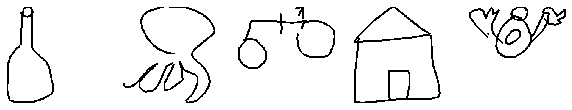

Parameter containing:
tensor([-0.0022], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.0040], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.0178], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.0020], device='cuda:0', requires_grad=True)
1 -------------------------------------------
Parameter containing:
tensor([0.0015], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.0037], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.0247], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.0164], device='cuda:0', requires_grad=True)
2 -------------------------------------------
Parameter containing:
tensor([-0.0002], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.0018], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.0423], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.0271], device='cuda:0', requi

FileNotFoundError: [Errno 2] No such file or directory: 'models/quickdraw_sagan/gen_12.pt'

In [29]:
from models import *
with torch.no_grad():
    real_imgs, cut_imgs, labels = next(iter(dataloader))
    labels = labels.float()
    fig, axes = plt.subplots(1, 5, figsize=(10,3))
    for i in range(5):
        axes[i].imshow(real_imgs[i].view(256,256), cmap="Greys")
        axes[i].axis('off')
    plt.show()
    gen = nn.DataParallel(SA_Generator(imsize=256, F=64)).to(0)
    disc = nn.DataParallel(SA_Discriminator(imsize=256, F=64)).to(0)
    for i in range(1, 100, 1):
        gen.load_state_dict(torch.load('models/quickdraw_sagan/gen_{}.pt'.format(i)))
        gen.eval()
        disc.load_state_dict(torch.load('models/quickdraw_sagan/disc_{}.pt'.format(i)))
        disc.eval()
    #     gen.apply(test_dropout)
        print(gen.module.attention1.gamma)
        print(gen.module.attention2.gamma)
        print(disc.module.attention1.gamma)
        print(disc.module.attention2.gamma)
#         z = torch.rand(size=(len(real_imgs), 100))
#         generated = gen(cut_imgs, labels, z)
#         fig, axes = plt.subplots(2, 5, figsize=(10,3))
#         for y in range(5):
#             axes[0, y].imshow(cut_imgs[y].view(256,256).cpu().detach(), cmap="Greys")
#             axes[0, y].axis('off')
#             axes[1, y].imshow(class_imgs[0 + y].view(28,28), cmap="Greys")
        #     axes[1, y].axis('off')
#             axes[1, y].imshow(generated[y].cpu().detach().view(256,256), cmap="Greys")
#             axes[1, y].axis('off')
    #         axes[1, y].set_title(labels[y].item())
    #     print(disc(generated, labels).mean())
        print(str(i) + ' -------------------------------------------')
#         plt.show()
        